In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import alphashape
from descartes import PolygonPatch

from tracer.build.field_routines import trace as tr
from tracer.build.field_routines import bprecalc as bpre 
from tracer.build.field_routines import bfield as bf 

In [3]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
Axes3D.set_axes_equal = lambda self: set_axes_equal(self)

In [4]:
def equal_spaced_points(x_coords, y_coords, n):
    x_out, y_out = np.zeros(n), np.zeros(n)
    # x and y coord differences between points 
    xcd = np.diff(x_coords) # 
    ycd = np.diff(y_coords)
    # calulate length of path and therefore length between points
    point_dists = (xcd**2 + ycd**2)**(1/2)
    arc_len = np.sum(point_dists)
    point_dist = arc_len/(n-1)
        
    # find coord of mth point by going along subsampling points
    # until it would be too ling, and then interpolating
    for i in range(n-1): # [0, n]
        full_len = i*point_dist  
        path_len, c = 0, 0
        while True: # go along polypath
            # would you be further than intended at the next point
            if path_len + point_dists[c] >= full_len:
                # YES: interpolate the goal between current and next point
                frac = (full_len - path_len)/point_dists[c]
                x_out[i] = x_coords[c] + frac*xcd[c]
                y_out[i] = y_coords[c] + frac*ycd[c]
                break
            else:
                # NO: go to next path segment
                path_len += point_dists[c]
                c += 1
    # place last point at same coord as first one
    x_out[-1] = x_coords[0]
    y_out[-1] = y_coords[0]
    
    return (x_out, y_out)

In [5]:
#field_file = "/raven/u/phg/grid/tracer/W7X/Fields/Field-EIM-ErrFullT-high.dat"
field_file = "/raven/u/phg/grid/tracer/W7X/Fields/Field-EIM-FullT-high.dat"
bpre.restore_field(field_file)
bf.scale_components([0,0,1.0])

In [6]:
n_loop, degree_steps = 3000, 1
def trace(x,z,p):
    return tr.field_line([x,z,p], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=10, dir=1)

In [52]:
# magnetic axis
# gax = tr.field_line([5.8807,0,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=720, dir=1)
# inner islands
#gax2AA = tr.field_line([5.44,-0.71,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=10, dir=1)
#gax2A = tr.field_line([5.4386,-0.707,0], degree_steps*np.pi/180.0, 360/degree_steps*n_loop, substeps=10, dir=1)
#cax = np.vstack((gax2A[:-1], gax2AA[:-1]))  # single

# cax = np.vstack((trace(5.48,0.895,0), trace(6.2082,0,0)))
#cax = np.vstack((trace(6.2084,0,0),))
#cax = trace(5.48,0.895,0)
# cax = trace(5.399,0.8537,0)
#cax = np.vstack((trace(6.27,0,0)[:-1],trace(6.2661,0,0)[:-1]))
# cax = np.vstack((trace(6.207,0,0)[:-1],trace(6.2066,0,0)[:-1]))
#cax = np.vstack((trace(6.28,0,0)[:-1], trace(6.2072,0,0)[:-1]))


#cax = trace(5.49,0.933,0)
#cax = trace(5.43,0.82,0)
#cax = trace(5.435,0.795,0)
cax = trace(5.5,0.945,0)


R, Z, P = cax.T
X, Y = np.cos(P)*R, np.sin(P)*R

<IPython.core.display.Javascript object>


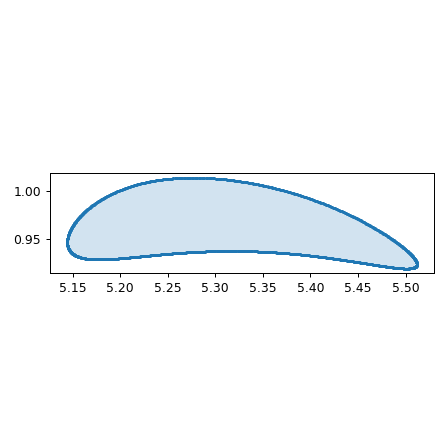

In [53]:
precision = 15
Index = 13
r, z = R[Index::360], Z[Index::360]

plt.close("all")
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

alpha_shape = alphashape.alphashape(np.array([r,z]).T, precision)
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
ax.scatter(r[::], z[::], s=1)

ax.set_aspect("equal")
fig.tight_layout()

In [54]:
island_contour = np.array(alpha_shape.simplify(tolerance=10e-4).boundary.xy)

i=4
#np.save(f"/u/phg/adas/radiation Ez analysis/data/outer_surface", arr=island_contour)
#np.save(f"/u/phg/adas/radiation Ez analysis/data/separatrix", arr=island_contour)
#np.save(f"/u/phg/adas/radiation Ez analysis/data/QSBisland{i}", arr=island_contour)
np.save(f"/u/phg/adas/radiation Ez analysis/data/INNER1island{i}", arr=island_contour)
# np.save(f"/u/phg/adas/radiation Ez analysis/data/further-out-surface{i}", arr=island_contour)

In [57]:
coords = []

precision = 25
for i in range(360//degree_steps):
    r, z = R[i::360], Z[i::360] # ??
    alpha_shape = alphashape.alphashape(np.array([r,z]).T, precision)
    alpha_bound = alpha_shape.boundary.xy
    print(i, int(200*alpha_shape.area), len(alpha_bound[0]), end=", ")
    coords.append(alpha_bound)
del R, Z, X, Y, r, z

0 217 3837, 1 218 3833, 2 218 3770, 3 218 3738, 4 219 3690, 5 219 3659, 6 220 3630, 7 220 3625, 8 221 3595, 9 222 3564, 10 223 3549, 11 224 3528, 12 225 3510, 13 226 3490, 14 227 3465, 15 228 3441, 16 228 3407, 17 229 3387, 18 230 3374, 19 231 3365, 20 232 3375, 21 234 3364, 22 235 3359, 23 236 3344, 24 237 3297, 25 238 3281, 26 238 3277, 27 238 3287, 28 239 3305, 29 239 3317, 30 239 3281, 31 240 3263, 32 240 3236, 33 240 3241, 34 240 3261, 35 239 3275, 36 239 3287, 37 239 3298, 38 240 3290, 39 240 3275, 40 240 3278, 41 240 3297, 42 239 3347, 43 239 3409, 44 239 3436, 45 238 3397, 46 238 3370, 47 238 3350, 48 237 3346, 49 236 3353, 50 235 3340, 51 234 3354, 52 232 3363, 53 231 3371, 54 230 3367, 55 229 3355, 56 228 3346, 57 228 3356, 58 227 3354, 59 226 3408, 60 225 3435, 61 224 3453, 62 223 3464, 63 222 3497, 64 221 3512, 65 220 3547, 66 220 3577, 67 219 3625, 68 219 3685, 69 218 3741, 70 218 3747, 71 218 3810, 72 217 3844, 73 218 3823, 74 218 3766, 75 218 3749, 76 219 3730, 77 219 36

In [60]:
num_of_points = 360
eq_sp_coords = np.empty((len(coords), 2, num_of_points))

for i, (x,y) in enumerate(coords):
    esx, esy = equal_spaced_points(x, y, num_of_points)
    eq_sp_coords[i,0] = esx
    eq_sp_coords[i,1] = esy
    print(i, end=", ")

np.savez("outer_edge_coords", data=eq_sp_coords)
# np.savez("single_island_edge_coords", data=eq_sp_coords)
# np.savez("double_island_edge_coords", data=eq_sp_coords)
# np.savez("triple_island_edge_coords", data=eq_sp_coords)
# np.savez("quad_island_edge_coords", data=eq_sp_coords)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 